# Homework 2: Data tables

This homework assignment is designed to get you comfortable loading and working with data tables.

You will need to download the **LexicalData_toclean.csv** file from the *Homework/lexDat* folder in the class GitHub repository. 

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides the reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not.

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. **Loading the Data (1 point)** 

Use the `setwd` and `read.csv` functions to load the data table from the **LexicalData_toclean.csv** file. Use the `head` function to look at the first few rows of the data. 

In [8]:
# Import relevant library
library('tidyverse')

# Import data
setwd('/Users/jenahblack/Documents/Current_Coursework/Data_Science/DataSciencePsychNeuro_CMU85732/Homeworks/lexDat')
lexdata <- read.csv('LexicalData_toclean.csv')
head(lexdata)

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore
,<int>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>
1,157,1,1,710,browse,false,-0.437
2,67,1,1,"1,094",refrigerant,false,0.825
3,120,1,1,587,gaining,false,-0.645
4,21,1,1,984,cheerless,false,0.025
5,236,1,1,577,pattered,false,-0.763
6,236,2,1,715,conjures,false,-0.364


The **LexicalData_toclean.csv** file contains the variables `Sub_ID` (Subject ID), `Trial` (the trial number), `D_RT` (reaction time) and `D_Word` (the word they were responding to).

---
## 2. **Data Cleansing (4 points)**

There are three things we want to do to make this data more useable:
* Get rid of the commas in the reaction time values, and make this variable numeric (hint: check out the functions `gsub` and `as.numeric`).
* Get rid of rows where the reaction times are missing (hint: you can use the `filter` function from `tidyverse`, but you'll need to load the library).
* Make sure all of the reaction times are positive. 

Write code that will copy the data to a new variable and make the above changes. 

In [11]:
# convert the reaction times to numeric
lexdata <- lexdata %>% 
              mutate(D_RT = gsub(',', '', D_RT),
                     D_RT = as.numeric(D_RT))

# remove any missing reaction times values
lexdata <- lexdata %>% filter(!is.na(D_RT))              

# check if any missing reaction times remain
anyNA(lexdata$D_RT)

# check for any negative reaction times
range(lexdata$D_RT)[1] < 0

# There are no negative values in D_RT, but you could remove them in this way:
lexdata <- lexdata %>% filter(D_RT >= 0)
head(lexdata)


[1] FALSE

[1] FALSE

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore
,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<dbl>
1,157,1,1,710,browse,false,-0.437
2,67,1,1,1094,refrigerant,false,0.825
3,120,1,1,587,gaining,false,-0.645
4,21,1,1,984,cheerless,false,0.025
5,236,1,1,577,pattered,false,-0.763
6,236,2,1,715,conjures,false,-0.364


For each of the three actions above, is it addressing a data anomaly (as described in the Müller reading)? If so, name the *type* of anomaly it's addressing. 

> *Write your response here.*
> * First action: Syntactic anomaly 
> * Second action: Coverage anomaly
> * Third action: Semantic anomaly  

---
## 3. **Data Manipulation with Tidyverse (4 points)**

Now let's use `tidyverse` functions to play around with this data a bit. Use the piping operator (`%>%`) in both of these code cells. 

First, let's get some useful summary **statistics** using `summarise`. Output a table that tells us how many observations there are in the data set, as well as the mean and standard deviation of the reaction times.

In [14]:
lexdata_summary <- lexdata %>%
                      summarize(num_observations = dim(lexdata)[1],
                                mean_RT = mean(D_RT),
                                standard_deviation = sd(D_RT))
lexdata_summary

num_observations,mean_RT,standard_deviation
<int>,<dbl>,<dbl>
62607,807.2667,377.4396


Now, we'll use `mutate` to re-number the trials, starting from 0 instead of 1. Make a new variable that is equal to the `Trial` variable minus one. 

In [16]:
lexdata <- lexdata %>% 
              mutate(New_Trial_Num = Trial-1)

head(lexdata)

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,New_Trial_Num
,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
1,157,1,1,710,browse,false,-0.437,0
2,67,1,1,1094,refrigerant,false,0.825,0
3,120,1,1,587,gaining,false,-0.645,0
4,21,1,1,984,cheerless,false,0.025,0
5,236,1,1,577,pattered,false,-0.763,0
6,236,2,1,715,conjures,false,-0.364,1


ERROR: Error in eval(expr, envir, enclos): object 'New_Trial_Num' not found


---
## 4. **Plotting Data (1 point)**

Use the `plot()` function to visualize the data, in a way that helps you see if there's a relationship between `D_RT` and your new trial variable.

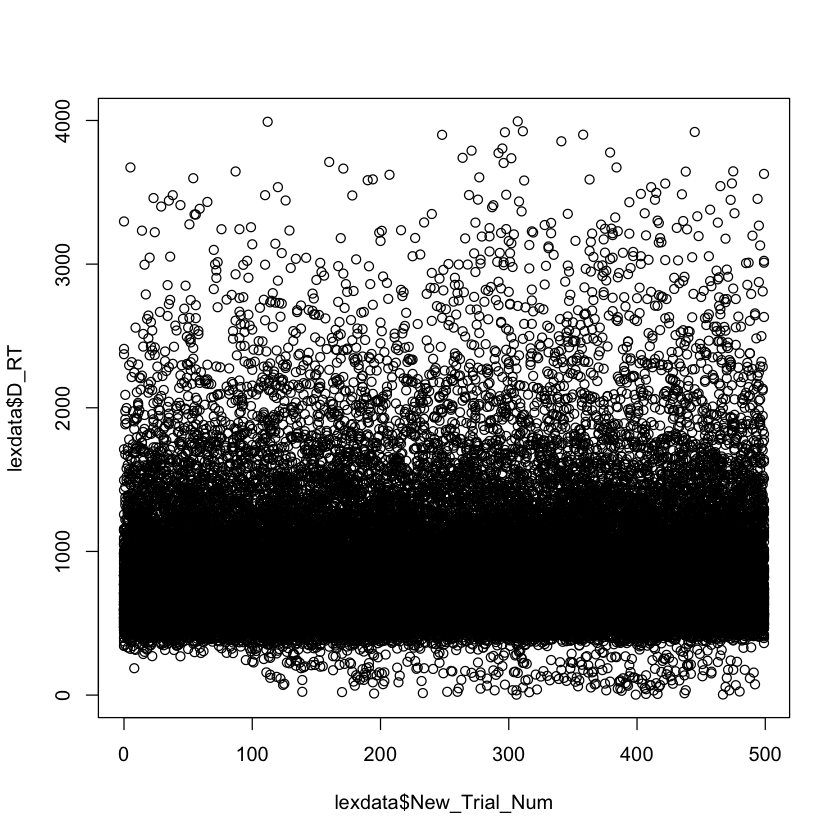

In [17]:
plot(lexdata$New_Trial_Num, lexdata$D_RT)

That's all for Homework 2! When you are finished, save the notebook as Homework2.ipynb, push it to your class GitHub repository (the one you made for Homework 1) and send the instructors a link to your notebook via Canvas. You can send messages via Canvas by clicking "Inbox" on the left and then pressing the icon with a pencil inside a square.

**DUE:** 5pm EST, Feb 11, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> Asal Yunusova